# R3 Internal lab - Supervised Learning 


# Building a Student Performace Prediction System



The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [66]:
import pandas as pd 
dataset = pd.read_csv("students-data.csv", delimiter=';')
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [67]:
dataset.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# Question 2 - drop missing values 
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [68]:
dataset.index.name = "number"
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [69]:
dataset = dataset.dropna()

# Transform Data

## Question 3 

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [70]:
import numpy as np
dataset.select_dtypes(exclude='number').columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

# Question 4 - Drop variables with less variance 

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [72]:
dataset.shape

(395, 33)

In [73]:
variance_data = dataset.var()
variance_data = variance_data.loc[variance_data < 1]
variance_data

traveltime    0.486513
studytime     0.704324
failures      0.553017
famrel        0.803997
freetime      0.997725
Dalc          0.793420
dtype: float64

In [74]:
dataset.drop(variance_data.index, axis=1, inplace=True)
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 5 - Encode all categorical variables to numerical 

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [75]:
categorical_column = dataset.select_dtypes(exclude='number').columns
for c in categorical_column:
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    dataset[c] = le.fit_transform(dataset[c])

In [76]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


# Question 6 - Convert the continuous values of grades into classes 

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [77]:
dataset['G1'] = np.where(dataset['G1'] >= 10, 1,0)
dataset['G2'] = np.where(dataset['G2'] >= 10, 1,0)
dataset['G3'] = np.where(dataset['G3'] >= 10, 1,0)

In [78]:
dataset['G3'].value_counts()

1    265
0    130
Name: G3, dtype: int64

In [79]:
dataset['G1'].unique()

array([0, 1], dtype=int64)

# Question 7 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

Answer

In [80]:
X = dataset.drop('G3', axis=1)
y = dataset['G3']

In [81]:
X.shape

(395, 26)

# Question 8 - Training and testing data split

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=95, random_state=101)

In [83]:
print('X_train - ', X_train.shape)
print('X_test - ', X_test.shape)

X_train -  (300, 26)
X_test -  (95, 26)


# Question 9 - Model Implementation and Testing the Accuracy 

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [84]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
model = logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9263157894736842

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90        31
           1       0.98      0.91      0.94        64

   micro avg       0.93      0.93      0.93        95
   macro avg       0.91      0.94      0.92        95
weighted avg       0.93      0.93      0.93        95



In [87]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[30  1]
 [ 6 58]]


## Section 2 - K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

In [88]:
import warnings 
warnings.filterwarnings('ignore')

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1 - Import the data set and print 10 random rows from the data set

In [89]:
iris_dataset = pd.read_csv('iris.csv')

In [90]:
iris_dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [91]:
iris_dataset.drop('Id', axis=1, inplace=True)
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [92]:
numerical_column = iris_dataset.select_dtypes(include='number').columns
for c in numerical_column:
    iris_dataset[c] = iris_dataset[c].replace(np.nan,np.median(iris_dataset[c].dropna()))
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [93]:
iris_dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [94]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
iris_dataset['Species'] = le.fit_transform(iris_dataset['Species'])

## Question 4 - Observe the association of each independent variable with target variable 
Drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

In [95]:
iris_dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.775061,-0.417318,0.944477,0.952513,1.000000


## Question 5 - Observe the independent variables variance 

drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [96]:
iris_dataset.var() < 0.1

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

Since there is no columns under 0.1 we are not removing any columns

## Question 6 - Plot the scatter matrix for all the variables 

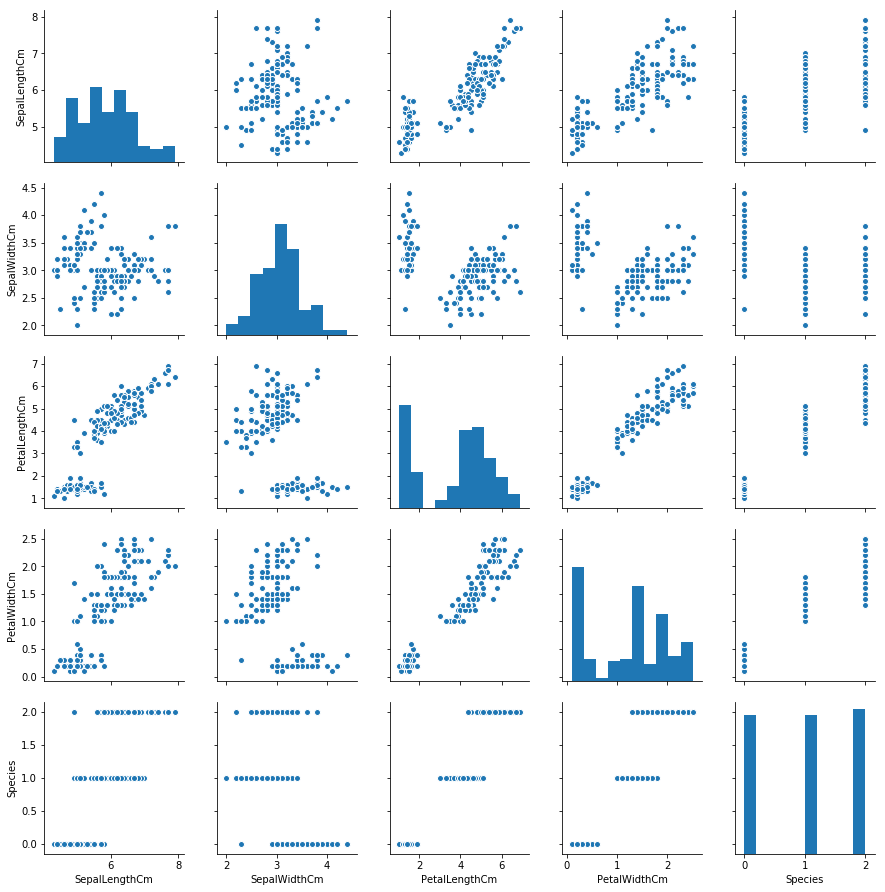

In [97]:
sns.pairplot(iris_dataset)

## Split the dataset into training and test sets

## Question 7 - Split the dataset into training and test sets with 80-20 ratio

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris_dataset.drop('Species',axis=1), 
                                                    iris_dataset['Species'], test_size=0.20, 
                                                    random_state=101)

## Question 8 - Model 

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [100]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = [3,5,9]
for n in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=n)
    pred = knn_model.fit(X_train_iris, y_train_iris).predict(X_test_iris)
    print('Accuracy for N=', n)
    print('Accuracy Score is',accuracy_score(y_test_iris, pred))

Accuracy for N= 3
Accuracy Score is 0.9354838709677419
Accuracy for N= 5
Accuracy Score is 1.0
Accuracy for N= 9
Accuracy Score is 0.967741935483871


## Question 9 - Cross Validation 

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [101]:
from sklearn.model_selection import GridSearchCV
parameter = {'n_neighbors':[1,3,5,7,9,11,13,15,17,19]}
knn_model = KNeighborsClassifier()
clf = GridSearchCV(knn_model, parameter, cv=5)
clf.fit(X_train_iris, y_train_iris)
print(clf.estimator.kneighbors)
pred = clf.predict(X_test_iris)
print('Grid Search CV Accuracy Score is',accuracy_score(y_test_iris, pred))
mse_n = 1 - accuracy_score(y_test_iris, pred)
print('Grid Search CV Misclassification error (MSE) is', mse_n)

<bound method KNeighborsMixin.kneighbors of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')>
Grid Search CV Accuracy Score is 0.967741935483871
Grid Search CV Misclassification error (MSE) is 0.032258064516129004


In [102]:
neighbors = [1,3,5,7,9,11,13,15,17,19]
mse = {}
for n in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=n)
    pred = knn_model.fit(X_train_iris, y_train_iris).predict(X_test_iris)
    print('Accuracy for N=', n)
    print('Accuracy Score is',accuracy_score(y_test_iris, pred))
    mse_n = 1 - accuracy_score(y_test_iris, pred)
    print('Misclassification error (MSE) is', mse_n)
    mse[n] = mse_n

Accuracy for N= 1
Accuracy Score is 0.9354838709677419
Misclassification error (MSE) is 0.06451612903225812
Accuracy for N= 3
Accuracy Score is 0.9354838709677419
Misclassification error (MSE) is 0.06451612903225812
Accuracy for N= 5
Accuracy Score is 1.0
Misclassification error (MSE) is 0.0
Accuracy for N= 7
Accuracy Score is 0.9354838709677419
Misclassification error (MSE) is 0.06451612903225812
Accuracy for N= 9
Accuracy Score is 0.967741935483871
Misclassification error (MSE) is 0.032258064516129004
Accuracy for N= 11
Accuracy Score is 0.967741935483871
Misclassification error (MSE) is 0.032258064516129004
Accuracy for N= 13
Accuracy Score is 0.967741935483871
Misclassification error (MSE) is 0.032258064516129004
Accuracy for N= 15
Accuracy Score is 0.967741935483871
Misclassification error (MSE) is 0.032258064516129004
Accuracy for N= 17
Accuracy Score is 0.967741935483871
Misclassification error (MSE) is 0.032258064516129004
Accuracy for N= 19
Accuracy Score is 0.967741935483871


In [103]:
key_min = min(mse.keys(), key=(lambda k: mse[k]))

print('Model neighbours with minimum MSE is', key_min)
print('Model Misclassification error (MSE) is ', mse[key_min])

Model neighbours with minimum MSE is 5
Model Misclassification error (MSE) is  0.0


## Question 10 - Plot

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

Text(0,0.5,'Misclassification Error')

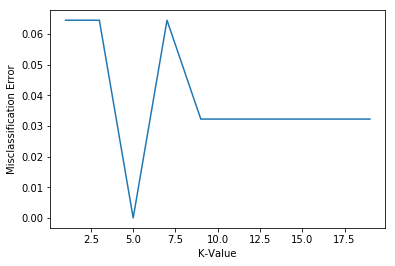

In [104]:
plt.plot(mse.keys(), mse.values())
plt.xlabel('K-Value')
plt.ylabel('Misclassification Error')

## Section 3 - Optional - Naive Bayes with Iris Data

The below section is optional and will not be graded


In [105]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

Problem statement
Dataset
The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

Attributes of the dataset: https://archive.ics.uci.edu/ml/datasets/Iris

### Load the iris data set 

In [106]:
iris_data = pd.read_csv('iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [107]:
iris_data['Species'].value_counts()

Iris-virginica     52
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [108]:
iris_data = iris_data.dropna()

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [109]:
X = iris_data.drop(['Id','Species'], axis= 1)
y = iris_data['Species']

In [110]:
X.shape

(150, 4)

In [111]:
#Check the dataset
print(y)
print(X)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

# Question 1 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

In [112]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

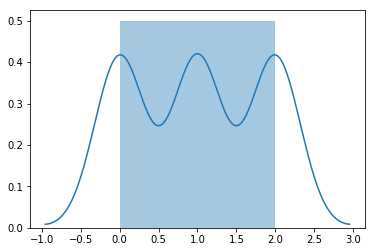

In [113]:
sns.distplot(y)

# Question 2 
Find Correlation among all variables and give your insights

In [131]:
iris_data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### Split data in Training and test set in 80:20.

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [116]:
print('X_Train Shape', X_train.shape)
print('y_train Shape', y_train.shape)
print('X_Test Shape', X_test.shape)
print('y_test Shape', y_test.shape)

X_Train Shape (120, 4)
y_train Shape (120,)
X_Test Shape (30, 4)
y_test Shape (30,)


# Question 3 
Do Feature Scaling 

In [117]:
# Use StandardScaler or similar methods
from sklearn.preprocessing import MinMaxScaler

In [118]:
scaler_train = MinMaxScaler()
X_train = scaler_train.fit_transform(X_train)

In [119]:
scaler_test = MinMaxScaler()
X_test = scaler_test.fit_transform(X_test)

# Question 4 
Train and Fit NaiveBayes Model

In [120]:
#Fit the model
from sklearn.naive_bayes import MultinomialNB

In [121]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [122]:
#Predict
pred = clf.predict(X_test)

In [123]:
print(pred)

[0 0 0 2 2 2 2 2 2 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 0 2]


# Question 5 
Print Accuracy and Confusion Matrix and Conclude your findings

In [124]:
# show Confusion Matrix
from sklearn.metrics import confusion_matrix

In [125]:
confusion_matrix(y_test, pred)

array([[ 9,  0,  1],
       [ 0,  0, 12],
       [ 0,  0,  8]], dtype=int64)

In [126]:
# show accuracy
from sklearn.metrics import accuracy_score

In [127]:
accuracy_score(y_test, pred)

0.5666666666666667

In [128]:
#Show precision and Recall metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [129]:
print('Recall sccore',recall_score(y_test, pred, average='macro'))

Recall sccore 0.6333333333333333


In [130]:
print('Pricision sccore',precision_score(y_test, pred, average='macro'))

Pricision sccore 0.4603174603174603
